<img src="Tarjeta.png">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ejemplos-de-Series-Temporales" data-toc-modified-id="Ejemplos-de-Series-Temporales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ejemplos de Series Temporales</a></span><ul class="toc-item"><li><span><a href="#Manchas-Solares" data-toc-modified-id="Manchas-Solares-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Manchas Solares</a></span></li><li><span><a href="#Nacimientos-en-California" data-toc-modified-id="Nacimientos-en-California-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Nacimientos en California</a></span></li><li><span><a href="#Ocupacion-de-habitacion" data-toc-modified-id="Ocupacion-de-habitacion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ocupacion de habitacion</a></span></li></ul></li><li><span><a href="#Descomposicion-de-Series-Temporales" data-toc-modified-id="Descomposicion-de-Series-Temporales-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Descomposicion de Series Temporales</a></span></li><li><span><a href="#Autocorrelacion-y-Auto-Correlacion-Parcial" data-toc-modified-id="Autocorrelacion-y-Auto-Correlacion-Parcial-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Autocorrelacion y Auto Correlacion Parcial</a></span></li><li><span><a href="#Procesos-Estacionarios" data-toc-modified-id="Procesos-Estacionarios-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Procesos Estacionarios</a></span></li><li><span><a href="#Ruido-Blanco" data-toc-modified-id="Ruido-Blanco-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ruido Blanco</a></span></li><li><span><a href="#Random-Walk" data-toc-modified-id="Random-Walk-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Random Walk</a></span></li><li><span><a href="#Metricas-de-Error" data-toc-modified-id="Metricas-de-Error-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Metricas de Error</a></span></li><li><span><a href="#MAE" data-toc-modified-id="MAE-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>MAE</a></span></li><li><span><a href="#MSE" data-toc-modified-id="MSE-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>MSE</a></span></li><li><span><a href="#RMSE" data-toc-modified-id="RMSE-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>RMSE</a></span></li><li><span><a href="#R2" data-toc-modified-id="R2-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>R2</a></span></li><li><span><a href="#MAPE" data-toc-modified-id="MAPE-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>MAPE</a></span></li></ul></div>

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

## Ejemplos de Series Temporales

Para empezar y enlanzando con lo anterior, pondremos ejemplos de series temporales, y las plotearemos
***

### Manchas Solares

Desde 1979, hasta 1983, numero de manchas solares

In [2]:
link_sunspots = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
df_sunspots = pd.read_csv(link_sunspots, parse_dates = ['Month'])

In [3]:
df_sunspots.describe().transpose()

count       mean        std  min   25%   50%     75%    max
Sunspots  2820.0  51.265957  43.448971  0.0  15.7  42.0  74.925  253.8

In [4]:
df_sunspots.head(5)

Month  Sunspots
0 1749-01-01      58.0
1 1749-02-01      62.6
2 1749-03-01      70.0
3 1749-04-01      55.7
4 1749-05-01      85.0

In [5]:
fig = px.line(df_sunspots, 
          x ='Month',
          y ='Sunspots',
          template = 'plotly_white'   )
fig.update_layout(title = '<b>Sunspots</b> desde 1970 hasta 1983')

***

### Nacimientos en California 

A continuación un dataset a nivel de día para California, para nacimientos de chicas.

In [6]:
link_births = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df_births = pd.read_csv(link_births)

In [7]:
df_births.head(5)

Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

In [8]:
df_births['Date'] = pd.to_datetime(df_births['Date'])

In [9]:
df_births.describe().transpose()

count       mean       std   min   25%   50%   75%   max
Births  365.0  41.980822  7.348257  23.0  37.0  42.0  46.0  73.0

In [10]:
fig = px.line(df_births, 
          x ='Date',
          y ='Births',
          template = 'plotly_white'   )
fig.update_layout(title = '<b>Nacimientos en California</b> en 1959')

### Ocupacion de habitacion

Datos experimentales utilizados para la clasificación binaria (ocupación de la habitación) a partir de la temperatura, la humedad, la luz y el CO2. La ocupación real se obtuvo a partir de imágenes temporalesque se tomaron cada minuto.

In [11]:
df_room = pd.read_csv('https://raw.githubusercontent.com/pbanikk/ML-on-occupancy-detection-dataset/master/Datasets/datatest.txt')


In [12]:
df_room.head(5)

no                 date  Temperature  Humidity       Light         CO2  \
0  140  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
1  141  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
2  142  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
3  143  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
4  144  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

   HumidityRatio  Occupancy  
0       0.004764          1  
1       0.004773          1  
2       0.004765          1  
3       0.004744          1  
4       0.004767          1

In [13]:
df_room.describe()

no  Temperature     Humidity        Light          CO2  \
count  2665.000000  2665.000000  2665.000000  2665.000000  2665.000000   
mean   1472.000000    21.433876    25.353937   193.227556   717.906470   
std     769.463558     1.028024     2.436842   250.210906   292.681718   
min     140.000000    20.200000    22.100000     0.000000   427.500000   
25%     806.000000    20.650000    23.260000     0.000000   466.000000   
50%    1472.000000    20.890000    25.000000     0.000000   580.500000   
75%    2138.000000    22.356667    26.856667   442.500000   956.333333   
max    2804.000000    24.408333    31.472500  1697.250000  1402.250000   

       HumidityRatio    Occupancy  
count    2665.000000  2665.000000  
mean        0.004027     0.364728  
std         0.000611     0.481444  
min         0.003303     0.000000  
25%         0.003529     0.000000  
50%         0.003815     0.000000  
75%         0.004532     1.000000  
max         0.005378     1.000000

In [14]:
fig = px.line(df_room, 
          x ='date',
          y ='Occupancy',
          template = 'plotly_white'   )
fig.update_layout(title = '<b>Nacimientos en California</b> en 1959')

In [15]:
fig = px.line(df_room, 
          x ='date',
          y ='Temperature',
          template = 'plotly_white'   )
fig.update_layout(title = '<b>Nacimientos en California</b> en 1959')

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## Descomposicion de Series Temporales

La descomposición de series temporales nos ayuda a comprender el valor de una serie temporal, y sus componentes más importantes. Se puede hacer de forma automática con la función **seasonal_decompose**. Enlace interesante [para series temporales](https://nwfsc-timeseries.github.io/atsa-labs/sec-tslab-decomposition-of-time-series.html)

In [16]:
link_pax = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df_pax =  pd.read_csv(link_pax, parse_dates = ['Month'], index_col = 'Month')
df_pax.head(5)

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Cargamos la liberías necesarias (matplotlib se utiliza para los gráficos)

In [17]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

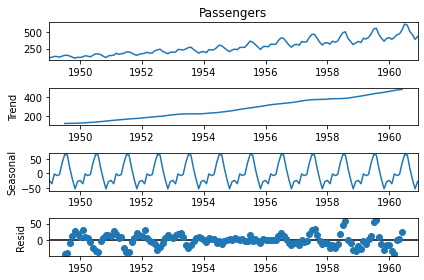

In [18]:
result = seasonal_decompose(df_pax['Passengers'], model='additive')
result.plot()
pyplot.show()

Podemos acceder a las componentes por serado e intentar ver su dimensión. Ademas, podemos dibujarlo con plotly para hacerlo interactivo

In [19]:
df_pax['observed'] = result.observed
df_pax['trend'] = result.trend
df_pax['seasonal'] = result.seasonal
df_pax['resid'] = result.resid
px.line(df_pax, template = 'plotly_white')

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## Autocorrelacion y Auto Correlacion Parcial

In [25]:
df_pax_corr = df_pax['Passengers'].autocorr()

In [26]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

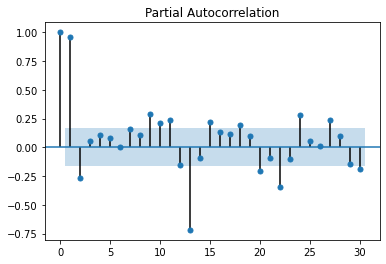

In [27]:
plot_pacf(df_pax['Passengers'], lags = 30)
plt.show()

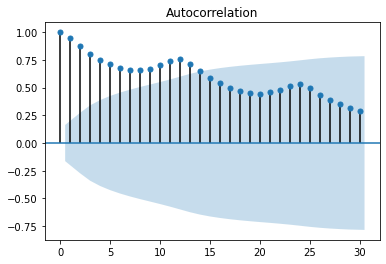

In [28]:
plot_acf(df_pax['Passengers'], lags = 30)
plt.show()

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## Procesos Estacionarios


La hipótesis nula de la prueba es que la serie temporal puede ser representada por una raíz unitaria, que no es estacionaria (tiene alguna estructura dependiente del tiempo). La hipótesis alternativa (que rechaza la hipótesis nula) es que la serie temporal es estacionaria.

+ **Hipótesis nula (H0)**: Si no se rechaza, sugiere que la serie temporal tiene una raíz unitaria, lo que significa que no es estacionaria. Tiene una estructura dependiente del tiempo.
+ **Hipótesis alternativa (H1**): Si se rechaza la hipótesis nula, sugiere que la serie temporal no tiene una raíz unitaria, lo que significa que es estacionaria. No tiene una estructura dependiente del tiempo.

Interpretamos este resultado utilizando el valor p de la prueba. Un valor p por debajo de un umbral (como el 5% o el 1%) indica que se rechaza la hipótesis nula (estacionariedad), mientras que un valor p por encima del umbral indica que no se rechaza la hipótesis nula (no estacionariedad).

+ **Valor p > 0,05**: No se rechaza la hipótesis nula (H0), los datos tienen una raíz unitaria y son no estacionarios.
+ **Valor p <= 0,05**: Rechaza la hipótesis nula (H0), los datos no tienen una raíz unitaria y son estacionarios.



In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_pax['Passengers'])
print('p-value: %f' % result[1])


p-value: 0.991880


<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## Ruido Blanco

El ruido blanco es una función muy importante en series temporales. Hay muchas maneras de generar el ruido blanco, nosotros utilizaremos numpy para crear el ruido. Ojo que si no se defie una semilla, nos pueden dar funciones disintasn

In [30]:
import numpy as np
import matplotlib.pyplot as plt

mean = 0
std = 1 
num_samples = 1000

ruido_blanco = np.random.normal(mean, std, size=num_samples)

In [31]:
pd.Series(ruido_blanco).describe()

count    1000.000000
mean       -0.031203
std         0.985533
min        -3.220414
25%        -0.712531
50%        -0.029665
75%         0.658692
max         2.850860
dtype: float64

In [32]:

px.line(ruido_blanco)

In [33]:
px.histogram(ruido_blanco)

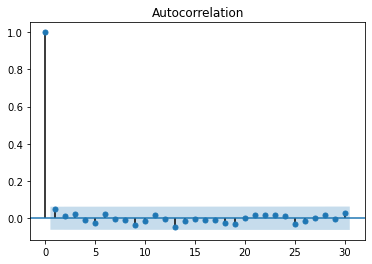

In [34]:
plot_acf(ruido_blanco)
plt.show()

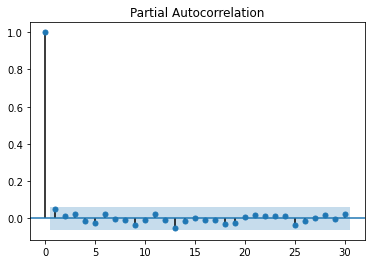

In [35]:
plot_pacf(ruido_blanco)
plt.show()

Curiosamente,son todos mayores que cero en valor absoluto, aunque no son estadísticamente diferentes de cero para los retrasos 1-20. Esto se debe a que estamos tratando con una muestra de las distribuciones y no con toda la población de todas las variantes aleatorias. Como ejercicio, intente establecer n = 1e6 en lugar de n = 100 o n = 50 en las llamadas anteriores para generar las secuencias WN y vea qué efecto tiene en la estimación de l ruido También es importante recordarque deberíamos esperar que aproximadamente 1 de cada 20 del ruido sea estadísticamente mayor que cero basándose sólo en el azar, especialmente para tamaños de muestra relativamente pequeños, así que no es de extrañar si alguna vez se encuentra con un caso como éste al inspeccionar los residuos del modelo.



In [36]:
result = adfuller(ruido_blanco)
result

(-30.00372210487216,
 0.0,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 2746.367586200491)

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

<br>

## Random Walk

Si entendemos el concepto de random walk, podemos generarlo utilizando las mismas funciones que con el ruido blanco, utilizando la funcion de cumsum, tal como podemos apreciar

In [37]:
# Generamos 500 pasos aleatorios
ruido_blanco = np.random.normal(loc=0, scale=1, size=500)


# Simulamos el Random Walk
random_walk = 100 + np.cumsum(ruido_blanco)



In [38]:
px.line(random_walk)

In [39]:
result = adfuller(random_walk)
pvalue = result[1]

Perhaps not surprisingly based on their names, autoregressive models such as RW’s have a high degree of autocorrelation out to long lags (

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

<br>

## Metricas de Error

Es importante evaluar los modelos. Para ello chequeraremos bastantes métricas. Es importante seleccionar que métrica es más útil para cada caso de uso. ([**Lectura**](https://www.dataquest.io/blog/understanding-regression-error-metrics/) útil). Empezaremos analizando el dataframe. Como modelo, utilizaremos la aproximación de la descomposición estacional

In [40]:
df_pax['Estimated'] = df_pax['trend'] + df_pax['seasonal']
df_pax_matrix = df_pax[['Passengers', 'Estimated']].copy()
df_pax_matrix = df_pax_matrix[df_pax_matrix['Estimated'].isna() == False]

Quitamos los NA, y analizamos los errores en el dataframe.

In [41]:
df_pax_matrix['error'] = df_pax_matrix['Passengers'] - df_pax_matrix['Estimated'] 
df_pax_matrix['error_abs'] = np.abs(df_pax_matrix['error'] )
df_pax_matrix['error_sq'] = df_pax_matrix['error']  * df_pax_matrix['error'] 

Calculamos la media

In [42]:
df_pax_matrix.mean().reset_index()

index           0
0  Passengers  277.250000
1   Estimated  278.001263
2       error   -0.751263
3   error_abs   14.411807
4    error_sq  371.786921

A continuación, utilizaremos la biblioteca de sklearn estimar las métricas de forma automática.

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #, mean_absolute_percentage_error
from math import sqrt

## MAE

In [44]:
mean_absolute_error(df_without_na['Estimated'], df_without_na['Passengers']) 


NameError: name 'df_without_na' is not defined

## MSE

In [45]:
mean_squared_error(df_without_na['Estimated'], df_without_na['Passengers']) 

NameError: name 'df_without_na' is not defined

## RMSE

In [182]:
sqrt(mean_squared_error(df_without_na['Estimated'], df_without_na['Passengers']) )

19.281776926821827

## R2

In [183]:
r2_score(df_without_na['Estimated'], df_without_na['Passengers']) 

0.967831356947515

## MAPE

In [184]:

def mean_absolute_percentage_error(y_true, y_pred): 
    

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [185]:
mean_absolute_percentage_error(df_without_na['Estimated'], df_without_na['Passengers']) 

6.0658752642173335

<hr style="height:5px;border-width:0;color:orange;background-color:orange">